In [1]:
import sys
import os
import scipy
import gzip
from scipy.stats import binom
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### phylogeny MRS 1D

In [2]:
answer_f = open('/data/project/Alzheimer/YSscript/EM_MRS/data/npvaf/MRS_1D/500_1_0.0_0.0/M1-5_input/7/npvaf.txt','r')

clement_f = open('/data/project/Alzheimer/YSscript/EM_MRS/data/combinedoutput/MRS_1D/500_1_0.0_0.0/M1-5_input/7/CLEMENT_decision.membership.txt','r')
clement_list = []
for fline in clement_f:
    membership = str(fline.rstrip())

    clement_list.append(membership)
clement_f.close()
print(len(clement_list))

answer_df = pd.DataFrame(columns=['ID','block1','CLUSTER'])
clement_df =  pd.DataFrame(columns=['ID','block1','CLUSTER'])

idx = 0
for fline in answer_f:
    ftab = fline.rstrip().split('\t')
    if ftab[0] == '':
        continue
    ID = ftab[0]

    block1_vaf = float(ftab[1])
    
    membership = ftab[2]
    answer_df.loc[idx] = ID, block1_vaf, membership
    clement_df.loc[idx] = ID, block1_vaf, clement_list[idx]
    idx += 1
answer_f.close()

500


In [3]:
sm_ec =  open('/data/project/Alzheimer/YSscript/EM_MRS/data/combinedoutput/MRS_1D/500_1_0.0_0.0/M1-5_input/7/CLEMENT_decision.results.txt','r')
for fline in sm_ec:
    if fline.startswith('NUM_CLONE'):
        print(fline)
    if fline.startswith('NUM_CHILD'):
        print(fline)
    if fline.startswith('score'):
        print(fline)
sm_ec.close()

NUM_CLONE	4

NUM_CHILD	3

score	421/500



In [4]:
sm_ec =  open('/data/project/Alzheimer/YSscript/EM_MRS/data/combinedoutput/MRS_1D/500_1_0.0_0.0/M1-5_input/7/CLEMENT_decision.mixture.txt','r')
for fline in sm_ec:
    print(fline)
sm_ec.close()

0.71	0.2	0.94	0.07



In [5]:
answer_df

,ID,block1,CLUSTER
0,chr1_954046,0.03,V2
1,chr1_1627406,0.03,V2
2,chr1_6887657,0.51,"S0,V1"
3,chr1_9128908,0.06,V1
4,chr1_9931966,0.14,V1
...,...,...,...
495,chr22_42693458,0.06,V2
496,chr22_46280113,0.02,V2
497,chr22_46308683,0.03,V2
498,chr22_50056894,0.02,V2


In [7]:
day = '230428'
output_dir = '/data/project/Alzheimer/EM_cluster/00.RESULT/'+day+'/01.cellData/example'
os.makedirs(output_dir, exist_ok=True)

59
173
46
222


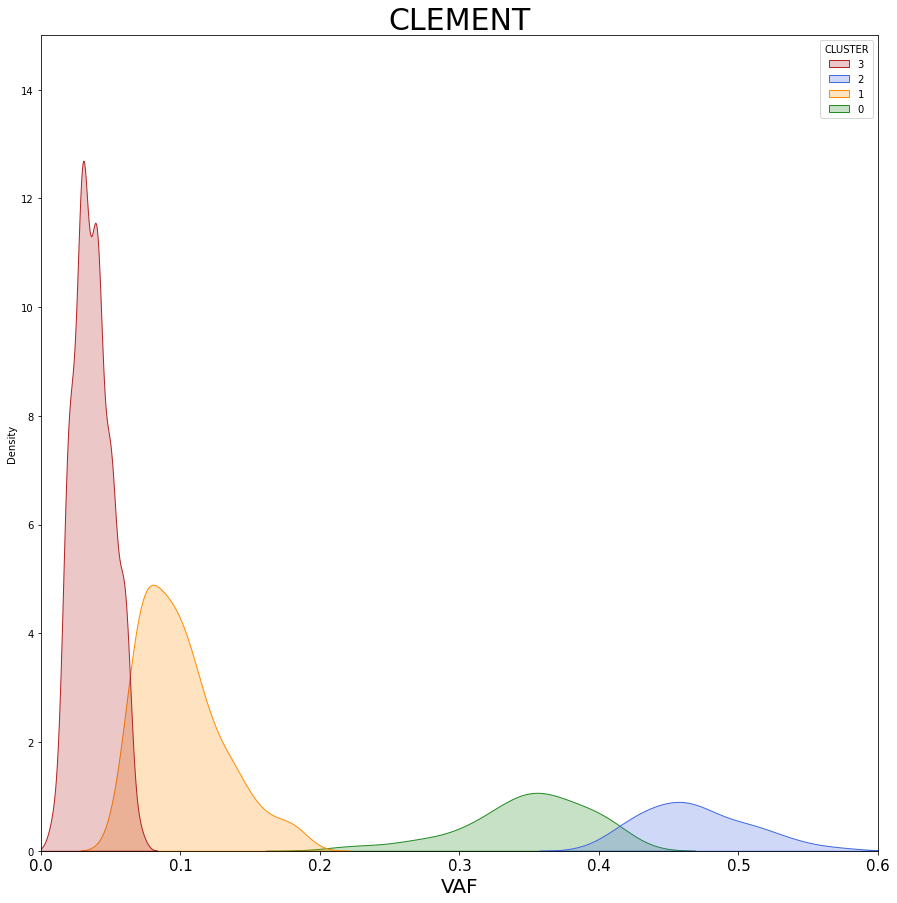

In [17]:
for group_name, group_idx in clement_df.groupby('CLUSTER').groups.items():
    y = clement_df.iloc[group_idx,2] # group
    x = clement_df.iloc[group_idx,1] # VAF by group
    print(len(x))


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot()
plt.tick_params(axis = 'x', labelsize = 15)
ax.set_xlabel('VAF', fontsize = 20)
ax.set_title('CLEMENT', fontsize=30)
sc = ax.set_xlim(0, 0.6); ax.set_ylim(0, 15)

color_dict = {'3': 'firebrick', '1': 'darkorange', '0': 'forestgreen', '2': 'royalblue'}

sns.kdeplot(data=clement_df, x="block1", hue="CLUSTER", palette=color_dict, shade =True)

ax.figure.savefig(output_dir + '/1D_CLEMENT.pdf')